#importing necessery liberaries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [6]:
lr=LinearRegression()

In [7]:
logr=LogisticRegression()

In [8]:
from sklearn.metrics import max_error,mean_squared_error,mean_absolute_error

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
ohe=OneHotEncoder()

In [13]:
from sklearn.model_selection import train_test_split

#importing file

In [14]:
df=pd.read_csv("health insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.shape

(1338, 7)

In [16]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
#checking is there any null value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#converting categorical data into simple numeric data by using any methods by get_ dummies, label encoder, one hot encoder

#here we use label encoder

In [20]:
dfle=df
dfle.sex= le.fit_transform(dfle.sex)
dfle.smoker= le.fit_transform(dfle.smoker)
dfle.region= le.fit_transform(dfle.region)
dfle

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#also check the kde plot between independent and dependent values 
and skewness kurtosis and other statistical values

#now seperating independent and dependent values 

In [21]:
x=df.drop('charges',axis='columns')
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [22]:
y=df.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#now checking the relation between independent and dependent data with the help of graphs

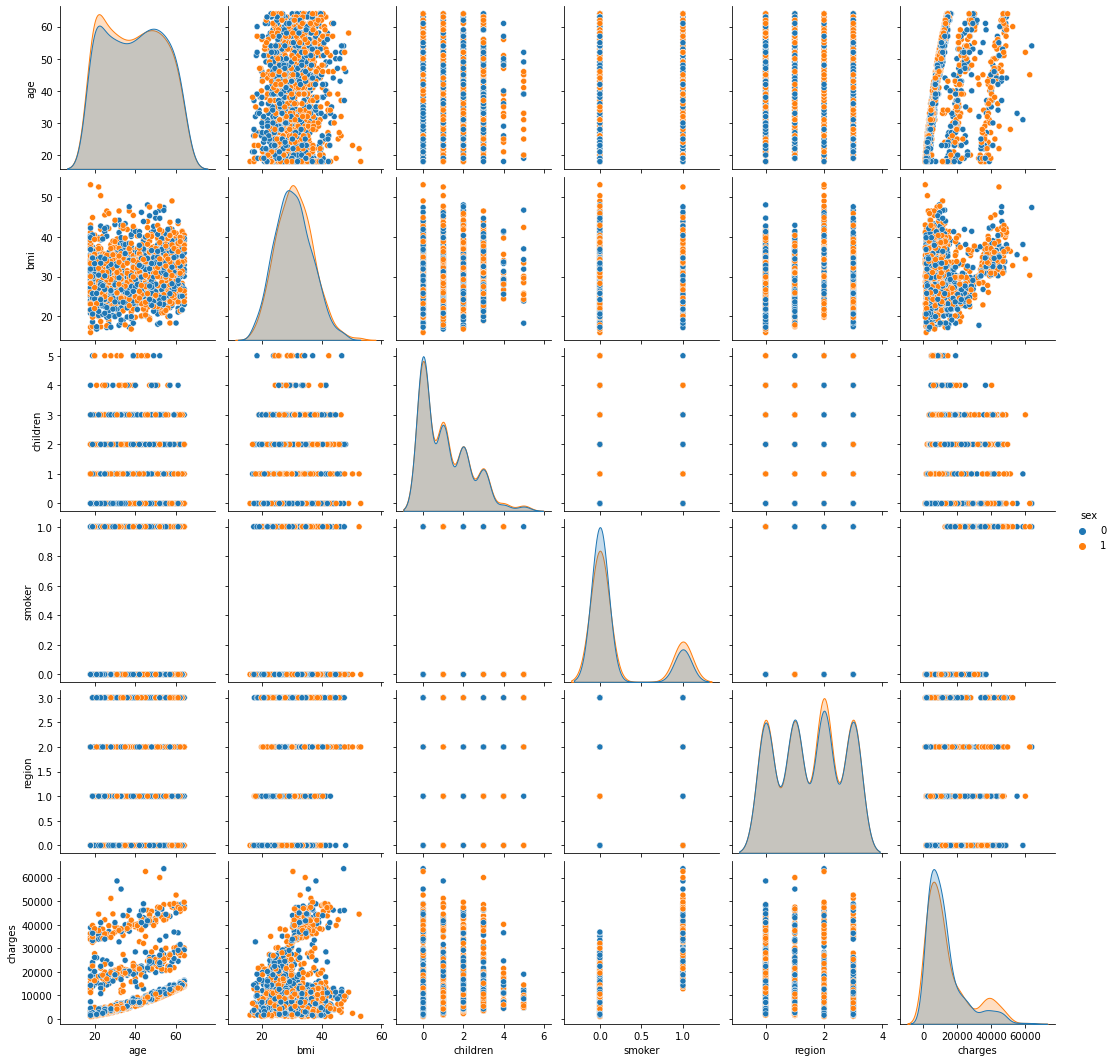

In [23]:
sns.pairplot(df,hue="sex")

In [24]:
#correlation between every row and column
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [25]:
#random_state cant take rondom samples everytime we run the code multiple times
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([  247.65554345,  -322.24562855,   306.16235194,   536.33345139,
       23752.11397762,  -255.00803652])

In [28]:
lr.intercept_

-10758.9321277781

In [29]:
y_pred=lr.predict(x_test)

In [30]:
lr.score(x_test,y_test)

0.739565191378212

In [31]:
max_error(y_test,y_pred)

25700.982534790128

In [32]:
mean_squared_error(y_test,y_pred)

40746214.900476776

In [33]:
mean_absolute_error(y_test,y_pred)

4338.147473695331